# Visualização de Resumos e Agregação - Estudos part11 Séries Temporais

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
data = pd.read_csv('avocado.csv', parse_dates=['Date'])

In [7]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Agrupando os dados e tirando a média 

summr = data.groupby('Date')['Total Volume'].mean().reset_index()

In [10]:
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


<AxesSubplot:xlabel='Date'>

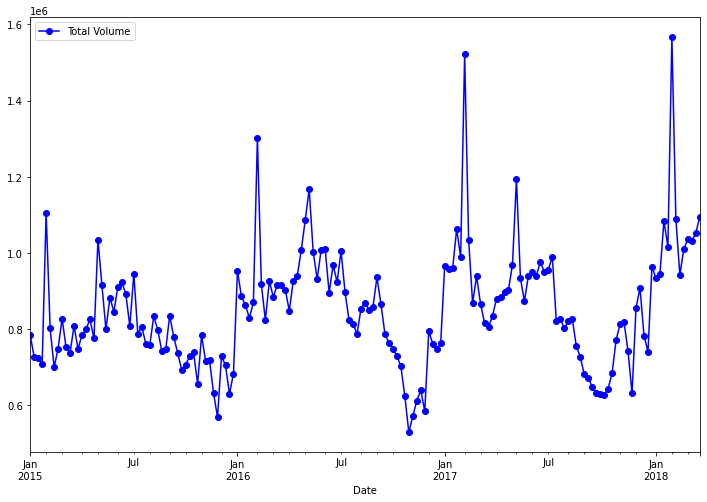

In [11]:
# Plotando o gráfico
fig, ax = plt.subplots(1,1,figsize=(12,8))
summr.set_index('Date').plot(ax=ax, marker='o', linestyle='-', color='blue')

Text(0.5, 0, 'Mês')

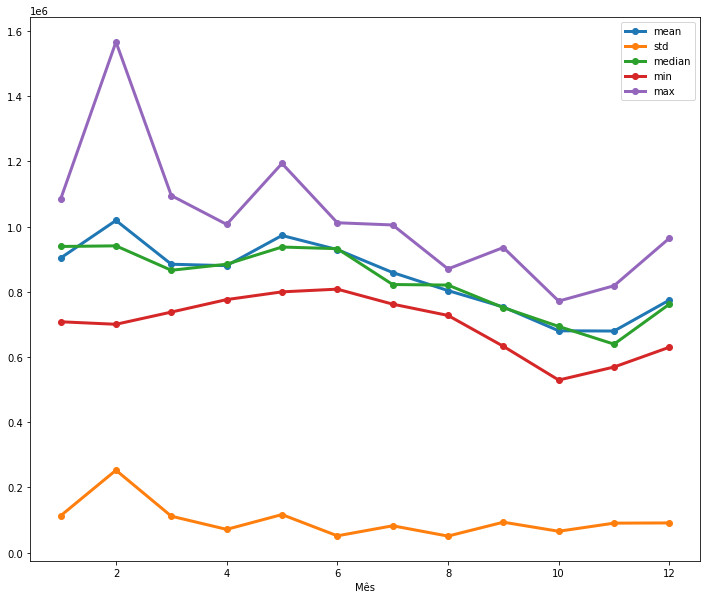

In [13]:
# Plotando gráfico com linhas e cores diferentes 
fig, ax = plt.subplots(1,1,figsize=(12,10))
(summr.set_index('Date')
    .assign(month=lambda df: df.index.month)
    .groupby('month')['Total Volume'].agg(['mean', 'std', 'median', 'min', 'max'])
    .plot(ax=ax, marker='o', linewidth=3))
ax.set_xlabel('Mês')